In [300]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import optimize

# Generate dataset

In [301]:
def random_cluster(x0, y0, points, scatter):
    X = []
    Y = []
    for i in range(points):
        X.append(random.gauss(x0, scatter))
        Y.append(random.gauss(y0, scatter))
    
    return (X, Y)


In [302]:
x1, y1 = random_cluster(1, 1, points=10, scatter=0.8)           #Has to be at right - label -1
x2, y2 = random_cluster(4, -1, points=10, scatter=0.8)           #Has to be at left - label +1

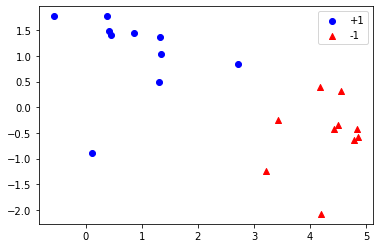

In [303]:
plt.scatter(x1, y1, marker='o', color='blue', label='+1')
plt.scatter(x2, y2, marker='^', color='red', label='-1')
plt.legend()

In [304]:
xi1 = np.column_stack((x1, y1))
xi2 = np.column_stack((x2, y2))

# Define loss function

In [305]:
def penalty(w, b):
    total = 0
    for i in range(len(x1)):
        temp = max(0, 1+1*(np.matmul(w.T, xi1[i]) - b))
        total += temp**2
    
    for i in range(len(x2)):
        temp = max(0, 1-1*(np.matmul(w.T, xi2[i]) - b))
        total += temp**2
    
    return total



In [306]:
def objective_func(w):
    return 0.5*np.matmul(w.T, w)

In [307]:
def loss_function(v, c=100):
    v = np.array(v)
    return objective_func(v[:-1]) + c*penalty(v[:-1], v[-1])

# Using SciPy Gradient Descent

In [308]:
r = optimize.minimize(loss_function, x0=(-1, 0, 0))

In [309]:
r

      fun: 1.217353465816568
 hess_inv: array([[0.00558501, 0.00281451, 0.02014152],
       [0.00281451, 0.00971846, 0.01290863],
       [0.02014152, 0.01290863, 0.07522088]])
      jac: array([-1.33514404e-04, -5.99026680e-06,  4.27067280e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 343
      nit: 33
     njev: 83
   status: 2
  success: False
        x: array([ 1.02471314, -1.17138257,  2.80137262])

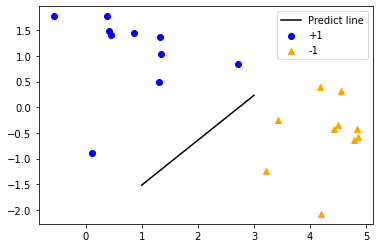

In [310]:
x_space = np.linspace(1, 3, 100)
y_space = (-1*r.x[0]*x_space / r.x[1]) + r.x[2]/r.x[1]
plt.scatter(x1, y1, marker='o', color='blue', label='+1')
plt.scatter(x2, y2, marker='^', color='orange', label='-1')
plt.plot(x_space, y_space, color='black', label='Predict line')
plt.legend()

# Manual Gradient Descent

In [311]:
def dWdw1(w, func, dx):
    h = np.array([dx, 0, 0])
    return (func(w + h)-func(w))/dx

def dWdw2(w, func, dx):
    h = np.array([0, dx, 0])
    return (func(w + h)-func(w))/dx

def dWdb(w, func, dx):
    h = np.array([0, 0, dx])
    return (func(w + h)-func(w))/dx

def grad(w, func, dx):
    a = dWdw1(w, func, dx)
    b = dWdw2(w, func, dx)
    c = dWdb(w, func, dx)
    return np.array([a, b, c], dtype='float64')
    

In [312]:
w = np.random.random(3)*6 -3
epochs = 1000
learning_rate = 0.0001
loss = []
for _ in range(epochs):
    l = grad(w, loss_function, 10**-10)
    loss.append(l)
    w = w - learning_rate * l

In [313]:
w

array([ 1.05099032, -1.27019534,  2.87104023])

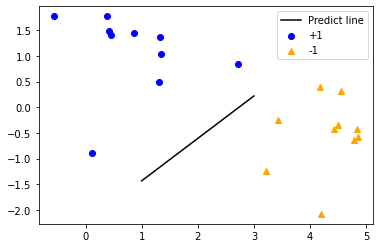

In [314]:
x_space = np.linspace(1, 3, 100)                                #initial random guess
y_space = (-1*w[0]*x_space / w[1]) + w[2]/w[1]
plt.scatter(x1, y1, marker='o', color='blue', label='+1')
plt.scatter(x2, y2, marker='^', color='orange', label='-1')
plt.plot(x_space, y_space, color='black', label='Predict line')
plt.legend()

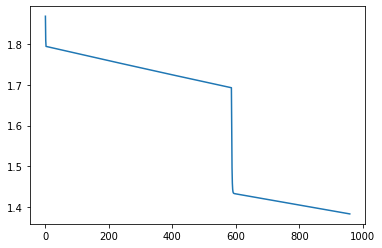

In [315]:
loss = np.array(loss)           # tune hyper parameters , learning_rate and epochs to get better loss

plt.plot([np.linalg.norm(i) for i in loss[40:]])